In [6]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [50]:
df = pd.read_csv("matches.csv")

df.head()

C:\Users\dastu\AppData\Local\Temp\ipykernel_30976\3816335167.py:1: DtypeWarning: Columns (136,141,143,145,146,148,149,151,152,154) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("matches.csv")


,id,home,away,date,year,time (utc),attendance,venue,league,part_of_competition,...,home_bench_10,home_bench_10_minute,home_bench_11_num,home_bench_11,home_bench_11_minute,away_bench_10_num,away_bench_10,away_bench_10_minute,away_starting_14_num,away_starting_14
0,18123,Charlton Athletic,Everton,"Saturday, August 18",2001,14:00,"20,451","The Valley, London, England",2001-2002 Barclays Premier League,na,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18124,Derby County,Blackburn Rovers,"Saturday, August 18",2001,14:00,"28,236","Pride Park Stadium, England",2001-2002 Barclays Premier League,na,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18125,Leeds United,Southampton,"Saturday, August 18",2001,14:00,"39,715","Elland Road, Leeds, England",2001-2002 Barclays Premier League,na,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18126,Leicester City,Bolton Wanderers,"Saturday, August 18",2001,14:00,"19,987","Filbert Street, England",2001-2002 Barclays Premier League,na,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18127,Liverpool,West Ham United,"Saturday, August 18",2001,14:00,"43,935","Anfield, Liverpool, England",2001-2002 Barclays Premier League,na,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df['result'] = np.where(df['home_score'] > df['away_score'], 1, np.where(df['home_score'] < df['away_score'], 2, 0))

def extraer_numero(texto):
    patron = r'\((\d+)\)'
    resultado = re.search(patron, texto)
    if resultado:
        return int(resultado.group(1))
    else:
        return None

columnas_deseadas = ['home','away','home_score', 'year', 'away_score', 'home_possession', 'away_possession', 'result', 'home_shotsSummary', 
                     'away_shotsSummary', 'home_yellowCards', 'away_yellowCards', 'home_redCards', 'away_redCards']

df = df.filter(items=columnas_deseadas)
df['home_shotsSummary'] = df['home_shotsSummary'].apply(lambda x: extraer_numero(x) if pd.notnull(x) else None)
df['away_shotsSummary'] = df['away_shotsSummary'].apply(lambda x: extraer_numero(x) if pd.notnull(x) else None)

df_united_city = df[((df['home'] == 'Manchester United') & (df['away'] == 'Manchester City')) | ((df['home'] == 'Manchester City') & (df['away'] == 'Manchester United'))]
df_united_arsenal = df[((df['home'] == 'Manchester United') & (df['away'] == 'Arsenal')) | ((df['home'] == 'Arsenal') & (df['away'] == 'Manchester United'))]
df_united_liverpool = df[((df['home'] == 'Manchester United') & (df['away'] == 'Liverpool')) | ((df['home'] == 'Liverpool') & (df['away'] == 'Manchester United'))]
df_city_arsenal = df[((df['home'] == 'Manchester City') & (df['away'] == 'Arsenal')) | ((df['home'] == 'Arsenal') & (df['away'] == 'Manchester City'))]
df_city_liverpool = df[((df['home'] == 'Manchester City') & (df['away'] == 'Liverpool')) | ((df['home'] == 'Liverpool') & (df['away'] == 'Manchester City'))]
df_arsenal_liverpool = df[((df['home'] == 'Arsenal') & (df['away'] == 'Liverpool')) | ((df['home'] == 'Liverpool') & (df['away'] == 'Arsenal'))]

df_united_city = pd.get_dummies(df_united_city, columns=['home', 'away'])
df_united_arsenal = pd.get_dummies(df_united_arsenal, columns=['home', 'away'])
df_united_liverpool = pd.get_dummies(df_united_liverpool, columns=['home', 'away'])
df_city_arsenal = pd.get_dummies(df_city_arsenal, columns=['home', 'away'])
df_city_liverpool = pd.get_dummies(df_city_liverpool, columns=['home', 'away'])
df_arsenal_liverpool = pd.get_dummies(df_arsenal_liverpool, columns=['home', 'away'])

df_united_city = df_united_city.dropna(axis=0)
df_united_arsenal = df_united_arsenal.dropna(axis=0)
df_united_liverpool = df_united_liverpool.dropna(axis=0)
df_city_arsenal = df_city_arsenal.dropna(axis=0)
df_city_liverpool = df_city_liverpool.dropna(axis=0)
df_arsenal_liverpool = df_arsenal_liverpool.dropna(axis=0)


print(df_united_city.head(10))
print(df_united_arsenal.head(10))
print(df_united_liverpool.head(10))
print(df_city_arsenal.head(10))
print(df_city_liverpool.head(10))
print(df_arsenal_liverpool.head(10))

modelos = [df_united_city, df_united_arsenal, df_united_liverpool, df_city_arsenal, df_city_liverpool, df_arsenal_liverpool]
nombre_modelos = ['Manchester United vs Manchester City', 'Manchester United vs Arsenal', 'Manchester United vs Liverpool', 
                  'Manchester City vs Arsenal', 'Manchester City vs Liverpool', 'Arsenal vs Liverpool']
filas_modelos = [df_united_city.shape[0], df_united_arsenal.shape[0], df_united_liverpool.shape[0], df_city_arsenal.shape[0], df_city_liverpool.shape[0], df_arsenal_liverpool.shape[0]]

      home_score  year  away_score  result  home_shotsSummary   
499            3  2002           1       1                6.0  \
646            1  2002           1       0                8.0   
911            3  2003           1       1                7.0   
1036           4  2003           1       1               11.0   
1258           0  2004           0       0               10.0   
1405           0  2004           2       2                3.0   
1559           1  2005           1       0                2.0   
1724           3  2005           1       1                7.0   
2058           3  2006           1       1               11.0   
2260           0  2006           1       2                3.0   

      away_shotsSummary  home_yellowCards  away_yellowCards  home_redCards   
499                 6.0               1.0               2.0            0.0  \
646                 6.0               1.0               1.0            0.0   
911                 9.0               0.0         

Nuevo modelo para el partido:  Manchester United vs Manchester City
Entrenado con una cantidad de 39 partidos
Estos son los resultados
Accuracy: 0.875
Precision: 0.8958333333333334
Recall: 0.875
F1 Score: 0.8598484848484848
Matriz de Confusión:


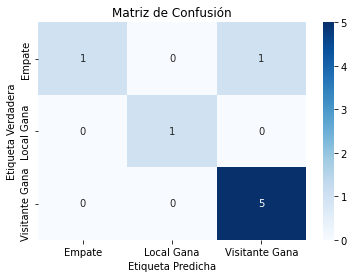

--------------------------------------------------------------------
Nuevo modelo para el partido:  Manchester United vs Arsenal
Entrenado con una cantidad de 42 partidos
Estos son los resultados
Accuracy: 0.4444444444444444
Precision: 0.42063492063492064
Recall: 0.4444444444444444
F1 Score: 0.35873015873015873
Matriz de Confusión:


c:\Users\dastu\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


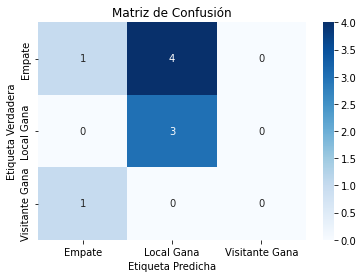

--------------------------------------------------------------------
Nuevo modelo para el partido:  Manchester United vs Liverpool
Entrenado con una cantidad de 42 partidos
Estos son los resultados
Accuracy: 0.6666666666666666
Precision: 0.6574074074074073
Recall: 0.6666666666666666
F1 Score: 0.6507936507936508
Matriz de Confusión:


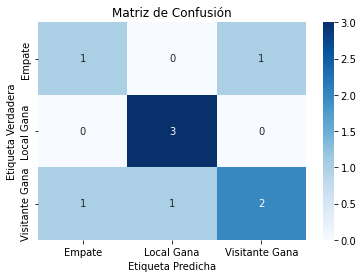

--------------------------------------------------------------------
Nuevo modelo para el partido:  Manchester City vs Arsenal
Entrenado con una cantidad de 40 partidos
Estos son los resultados
Accuracy: 0.75
Precision: 0.6
Recall: 0.75
F1 Score: 0.65625
Matriz de Confusión:


c:\Users\dastu\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


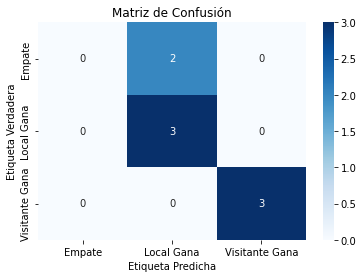

c:\Users\dastu\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


--------------------------------------------------------------------
Nuevo modelo para el partido:  Manchester City vs Liverpool
Entrenado con una cantidad de 40 partidos
Estos son los resultados
Accuracy: 0.5
Precision: 0.525
Recall: 0.5
F1 Score: 0.47023809523809523
Matriz de Confusión:


c:\Users\dastu\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


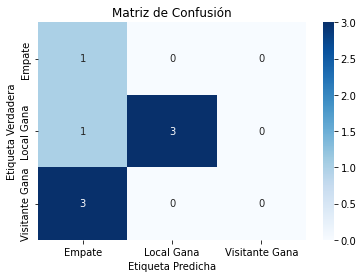

--------------------------------------------------------------------
Nuevo modelo para el partido:  Arsenal vs Liverpool
Entrenado con una cantidad de 42 partidos
Estos son los resultados
Accuracy: 0.6666666666666666
Precision: 0.7111111111111111
Recall: 0.6666666666666666
F1 Score: 0.674074074074074
Matriz de Confusión:


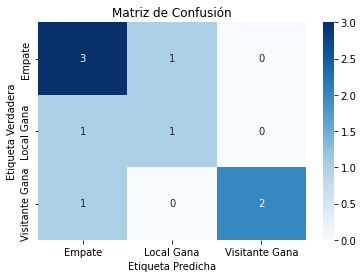

--------------------------------------------------------------------


In [52]:
n = 0
# Define los nombres de las clases
class_names = ['Empate', 'Local Gana', 'Visitante Gana']

for modelo in modelos:
    k = 0.1
    modelo['factor_of_importance'] = np.exp(k * (modelo['year'] - 2023))
    X = modelo.drop(['result', 'year'], axis=1)
    y = modelo['result']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10, 15],
        'criterion': ['gini', 'entropy']
    }

    rf_classifier = RandomForestClassifier(random_state=42)

    grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    rf_classifier_best = RandomForestClassifier(random_state=42, **best_params)
    rf_classifier_best.fit(X_train, y_train)

    y_pred = rf_classifier_best.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    confusion = confusion_matrix(y_test, y_pred)

    print("Nuevo modelo para el partido: ", nombre_modelos[n])
    print(f"Entrenado con una cantidad de {filas_modelos[n]} partidos")
    print("Estos son los resultados")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Matriz de Confusión:")
    # Visualización de la matriz de confusión
    sns.heatmap(confusion, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)

    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Verdadera')
    plt.title('Matriz de Confusión')

    plt.show()
    print("--------------------------------------------------------------------")
    n += 1

